In [39]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re
import time

### Write group like this: 
  "l/linkin_park"
  
 "k/kanye_west/"

In [48]:
group = "l/linkin_park/"

In [49]:
url = 'https://www.amalgama-lab.com/songs/' + group
r = requests.get(url)
soup = BeautifulSoup(r.text, 'html.parser')
songs_nav = soup.find_all('ul')

### Get list of songs

In [50]:
songs_list = songs_nav[6].text
songs_list = songs_list.replace(':', '').split('\n')
index_popular = songs_list.index("По популярности")
songs_list = songs_list[:index_popular]
songs_list = [song for song in songs_list if song!='']
songs_list

['\xa0\xa0 Linkin Park',
 '            ',
 '1stp Klosr',
 '26 Lettaz in Da Alphabet',
 'A Light That Never Comes',
 'A Line in the Sand',
 'A Place for My Head',
 'A Thousand Suns the Full Experience',
 'Across the Line',
 'All for Nothing',
 'And One',
 'Animals',
 'Announcement Service Public',
 'Battle Symphony',
 'Blackbirds',
 'Blackout',
 'Bleed It Out',
 'Blue',
 'Breaking the Habit',
 'Bubbles',
 'Burn It Down',
 'Burning in the Skies',
 'By Myself',
 'By_Myslf',
 'Carousel',
 'Castle of Glass',
 'Chali',
 'Chance of Rain',
 'Crawling',
 'Cure for the Itch',
 'Da Bloos',
 'Debris',
 'Dedicated',
 "Don't Stay",
 'Easier to Run',
 'Enth E Nd',
 'Esaul (A Place for My Head Demo)',
 'Faint',
 'Fallout',
 'Figure.09',
 'Figure.09 (demo 2002)',
 'Final Masquerade',
 'Forget',
 'Forgotten',
 'Frgt/10',
 'From the Inside',
 'Given Up',
 'Good Goodbye',
 'Guilty All the Same',
 'H! Vltg3',
 'Halfway Right',
 'Hands Held High',
 'Heavy',
 'High Voltage',
 'Hit the Floor',
 'I Have Not Be

### Create dataframe which consist of text of song

In [54]:
columns=['Название песни', 'Текст']
songs_list = [song.replace(' ', '_').lower() for song in songs_list]
pair = []
for song in songs_list:
  print(url+f'{song}.html')
  r = requests.get(url+f'{song}.html')
  soup_song = BeautifulSoup(r.text, 'html.parser')
  div = soup_song.find_all('div','string_container')
  text = []
  for d in div:
    text.append(d.text)
    if d.find_all("strong"):
      break
  pair.append([song, text])
df = pd.DataFrame(pair, columns=columns)

https://www.amalgama-lab.com/songs/l/linkin_park/  _linkin_park.html
https://www.amalgama-lab.com/songs/l/linkin_park/____________.html
https://www.amalgama-lab.com/songs/l/linkin_park/1stp_klosr.html
https://www.amalgama-lab.com/songs/l/linkin_park/26_lettaz_in_da_alphabet.html
https://www.amalgama-lab.com/songs/l/linkin_park/a_light_that_never_comes.html
https://www.amalgama-lab.com/songs/l/linkin_park/a_line_in_the_sand.html
https://www.amalgama-lab.com/songs/l/linkin_park/a_place_for_my_head.html
https://www.amalgama-lab.com/songs/l/linkin_park/a_thousand_suns_the_full_experience.html
https://www.amalgama-lab.com/songs/l/linkin_park/across_the_line.html
https://www.amalgama-lab.com/songs/l/linkin_park/all_for_nothing.html
https://www.amalgama-lab.com/songs/l/linkin_park/and_one.html
https://www.amalgama-lab.com/songs/l/linkin_park/animals.html
https://www.amalgama-lab.com/songs/l/linkin_park/announcement_service_public.html
https://www.amalgama-lab.com/songs/l/linkin_park/battle_sy

In [56]:
df.head(25)

,Название песни,Текст
0,_linkin_park,[]
1,____________,[]
2,1stp_klosr,"[I'm about to break\nЯ вот-вот сорвусь., I nee..."
3,26_lettaz_in_da_alphabet,"[Man, the other day\nЧувак, на днях, I was try..."
4,a_light_that_never_comes,"[Nah, you don't know me\nНет, вы меня не знает..."
5,a_line_in_the_sand,"[Today\nСегодня, We stood on the wall\nМы стоя..."
6,a_place_for_my_head,[I watch how the moon sits in the sky\nЯ смотр...
7,a_thousand_suns_the_full_experience,"[God save us every one\nСпаси нас всех, о Бог!..."
8,across_the_line,"[In this desert\nВ этой пустыне,, In darkness\..."
9,all_for_nothing,[So what 'cha waiting for\nНу так чего ты ждеш...


In [78]:
!pip install pymorphy2
import nltk
nltk.download("stopwords")
nltk.download('punkt')
from nltk import word_tokenize
from nltk.corpus import stopwords
from string import punctuation
from wordcloud import WordCloud, STOPWORDS
import string
import matplotlib.pyplot as plt
import pymorphy2
from collections import Counter
import string

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### Process the text translated into Russian

In [80]:
def rus_text(s_list):
  line_new = []
  for str_l in s_list:
    str_l = str_l.replace('\\n', ' ')
    new_string = ''
    for s in str_l: 
      # if s == ' ' or (s in string.ascii_letters):
      #   new_string += s
      if s == ' ' or (s in 'ЁЙЦУКЕНГШЩЗХЪФЫВАПРОЛДЖЭЯЧСМИТЬБЮёйцукенгшщзхъфывапролджэячсмитьбю'):
        new_string += s
    if new_string.lower() not in punctuation:
      line_new.append(new_string.lower())
  return line_new

In [81]:
text_list = rus_text(ds['Текст'].values)

In [82]:
def preprocessing_text(text_list):
  morph = pymorphy2.MorphAnalyzer()
  tokens_all = ' '
  for txt_list in text_list:
    txt_list = txt_list.replace('\\n', ' ')
    tokens = word_tokenize(txt_list)
    
    stop_words = stopwords.words('russian')
    
    stop_words.extend(['что', 'это', 'так', 'вот', 'быть', 'как', 'в', '—', '–', 'к', 'на', '...', '``', 'куплет', 'вступление', "ооо", 'припев', 'твой', "свой","весь","мочь", "оу", "распевка", "ао", "ради", "деньга", ""])
    tokens = [morph.parse(i)[0].normal_form for i in tokens if (i not in string.punctuation)]
    tokens = [i for i in tokens if (i not in stop_words)]
    for token in tokens:
      tokens_all += token+' '
  return tokens_all

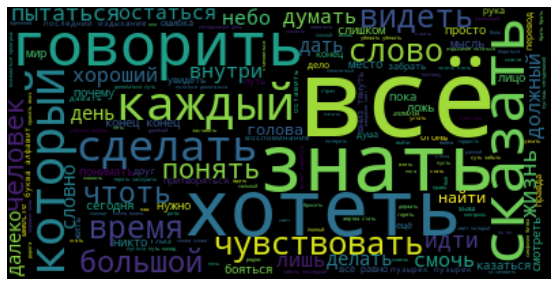

In [87]:
text_list = rus_text(ds['Текст'].values)
txt = preprocessing_text(text_list=text_list)
wordcloud = WordCloud(
    max_words = 200,
    repeat=False).generate(txt)
fig = plt.figure(
    figsize = (10, 5))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()